## Car Price Prediction Model

In [104]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
# Loading the Dataset

cars = pd.read_csv('/home/christine/Desktop/car price/Car-Price-Prediction-Challenge/car_price_prediction.csv',index_col = 0)

In [106]:
#Inspecting the Dataset
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [107]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-nu

In [108]:
cars.shape

(19237, 17)

In [109]:
cars.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [110]:
cars['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
195634 km      1
198253 km      1
91018 km       1
119484 km      1
117527 km      1
Name: Mileage, Length: 7687, dtype: int64

## Data Cleaning

In [111]:
# Removing km from mileage column

cars['Mileage'] = cars.Mileage.str.replace('km','')

In [112]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [113]:
cars.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


In [114]:
# Changing Prod.year column from int to date

cars['Prod. year'] = pd.to_datetime(cars['Prod. year'],format = '%Y')

In [115]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Price             19237 non-null  int64         
 1   Levy              19237 non-null  object        
 2   Manufacturer      19237 non-null  object        
 3   Model             19237 non-null  object        
 4   Prod. year        19237 non-null  datetime64[ns]
 5   Category          19237 non-null  object        
 6   Leather interior  19237 non-null  object        
 7   Fuel type         19237 non-null  object        
 8   Engine volume     19237 non-null  object        
 9   Mileage           19237 non-null  object        
 10  Cylinders         19237 non-null  float64       
 11  Gear box type     19237 non-null  object        
 12  Drive wheels      19237 non-null  object        
 13  Doors             19237 non-null  object        
 14  Wheel       

In [116]:
# Investigate the Engine volume column
cars['Engine volume'].value_counts()

#Removing Turbo from Engine volume column
cars['Engine volume'] = cars['Engine volume'].str.replace('Turbo','')

#converting the engine volume column to float
cars['Engine volume'] = cars['Engine volume'].astype(float)



In [117]:
#replace '-' with 0
cars['Levy'] = cars['Levy'].replace('-',0)

#Converting Levy column to float
cars['Levy'] = cars['Levy'].astype(float)

In [118]:
#converting mileage column to float
cars['Mileage'] = cars['Mileage'].astype(float)

In [119]:
#converting doors column to int
cars['Doors']= cars['Doors'].replace('04-May',4).replace('02-Mar',2).replace('>5',5)

In [120]:
#Converting Doors to object
cars['Doors'] =cars['Doors'].astype('object')

In [121]:
cars.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,632.528669,2.307990,1.532236e+06,4.582991,6.582627
std,1.905813e+05,567.721688,0.877805,4.840387e+07,1.199933,4.320168
min,1.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,0.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,1.317200e+04,642.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,2.207500e+04,917.000000,2.500000,1.888880e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000,16.000000


## Exploratory Data Analysis

Text(0.5, 1.0, 'Price distribution')

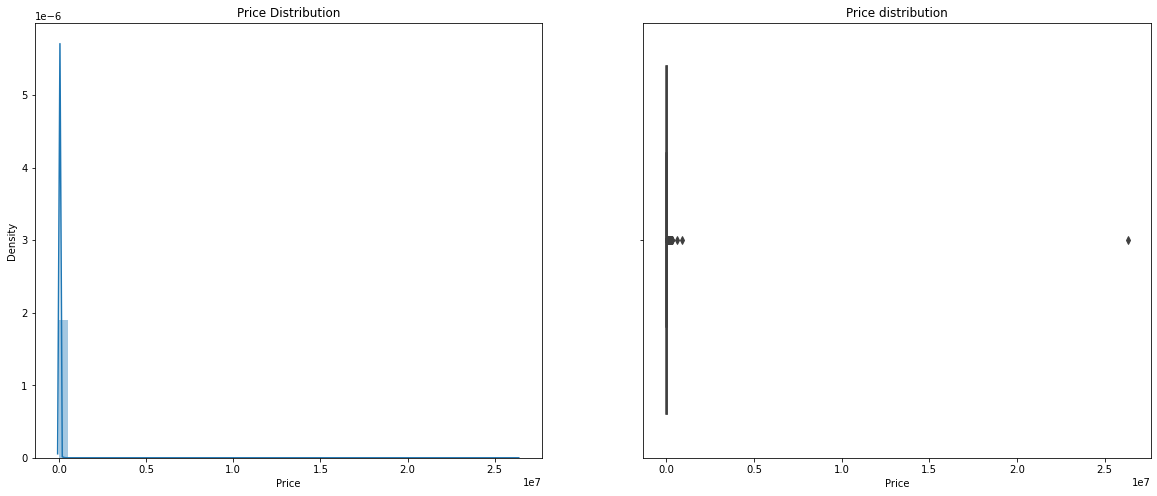

In [122]:
# Visualizing the dependent variable distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(cars.Price)
plt.title('Price Distribution')


plt.subplot(1,2,2)
sns.boxplot(cars.Price)
plt.title('Price distribution')

In [123]:
#Checking for outliers in the price column
cars[cars['Price']> 600000]


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45795524,627220,0.0,MERCEDES-BENZ,G 65 AMG 63AMG,2020-01-01,Jeep,Yes,Petrol,6.3,0.0,8.0,Tiptronic,4x4,4,Left wheel,Black,12
45761204,872946,2067.0,LAMBORGHINI,Urus,2019-01-01,Universal,Yes,Petrol,4.0,2531.0,8.0,Tiptronic,4x4,4,Left wheel,Black,0
45812886,26307500,0.0,OPEL,Combo,1999-01-01,Goods wagon,No,Diesel,1.7,99999.0,4.0,Manual,Front,2,Left wheel,Blue,0


In [124]:
# Dropping more outliers in the price column
data_dropped =cars[cars['Price']>600000]

cars = cars.drop(data_dropped.index,axis = 0)


Text(0.5, 1.0, 'Price distribution')

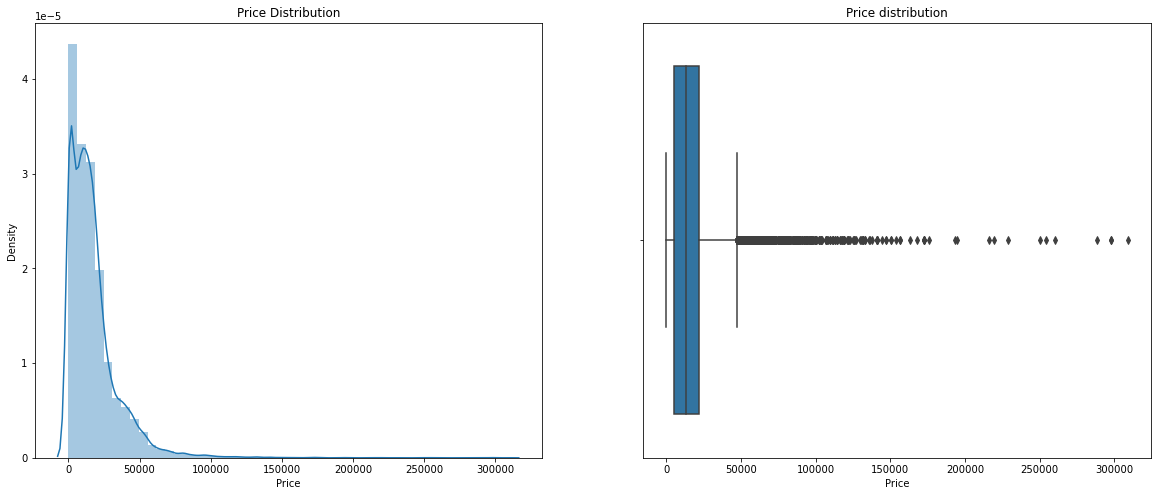

In [125]:
# Visualizing the dependent variable distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(cars.Price)
plt.title('Price Distribution')


plt.subplot(1,2,2)
sns.boxplot(cars.Price)
plt.title('Price distribution')

In [126]:
cars.Price.describe(percentiles=[0.25,0.5,0.75,0.85,0.90,1])

count     19234.000000
mean      17113.065717
std       18278.647663
min           1.000000
25%        5331.000000
50%       13172.000000
75%       22063.000000
85%       30734.000000
90%       38574.000000
100%     308906.000000
max      308906.000000
Name: Price, dtype: float64

$ Inference $
* The data  is skewed to the right meaning most prices in the dataset are below ```20000```
* There is a significance difference between the mean and median
* The data points are far spread out from the mean which indicates a high variance in the price 75% of the prices are below ```22063``` whereas the remaining 25% are between ```30734``` and ```308906```




## Visualizing Categorical Variables

In [127]:
cat_variables = cars.select_dtypes(include= ['object']).columns
cat_variables

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

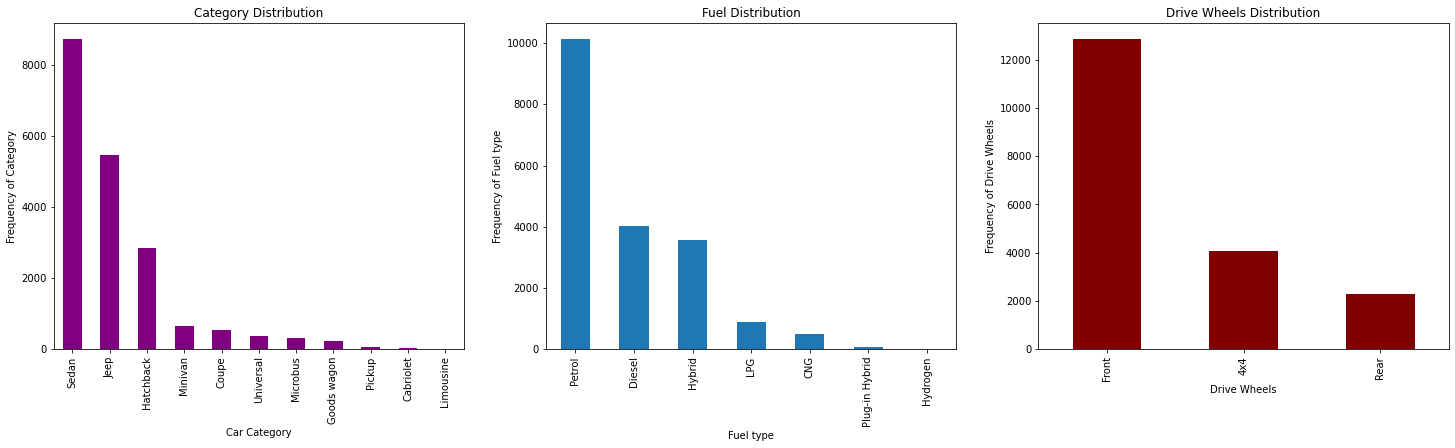

In [128]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = cars.Category.value_counts().plot(kind='bar',color = 'purple')
plt.title('Category Distribution')
plt1.set(xlabel = 'Car Category',ylabel = 'Frequency of Category')

plt.subplot(1,3,2)
plt1 = cars['Fuel type'].value_counts().plot(kind='bar')
plt.title('Fuel Distribution')
plt1.set(xlabel = 'Fuel type',ylabel = 'Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = cars['Drive wheels'].value_counts().plot(kind='bar',color ='maroon')
plt.title('Drive Wheels Distribution')
plt1.set(xlabel = 'Drive Wheels',ylabel = 'Frequency of Drive Wheels')

plt.show()

$ Inference $
* Sedans are the most purchased models
* Limousine is the least purchased model
* A higher percentage of the cars use petrol
* Most car models are two wheel drive

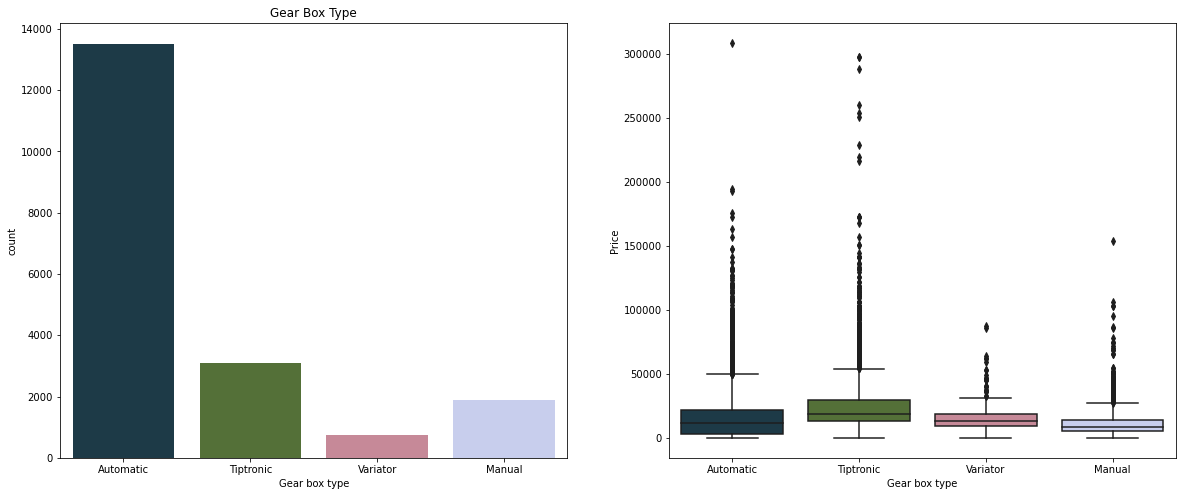

In [129]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(cars['Gear box type'],palette= ('cubehelix'))
plt.title('Gear Box Type')


plt.subplot(1,2,2)
sns.boxplot(x=cars['Gear box type'],y = cars.Price,palette=('cubehelix'))
plt.title
plt.show()

$ Inferences$
* According to the distribution autmatic cars are highly purchased
* Triptronic geabox type are the most highly priced cars 



## Distribution of Categorical Variables against Price

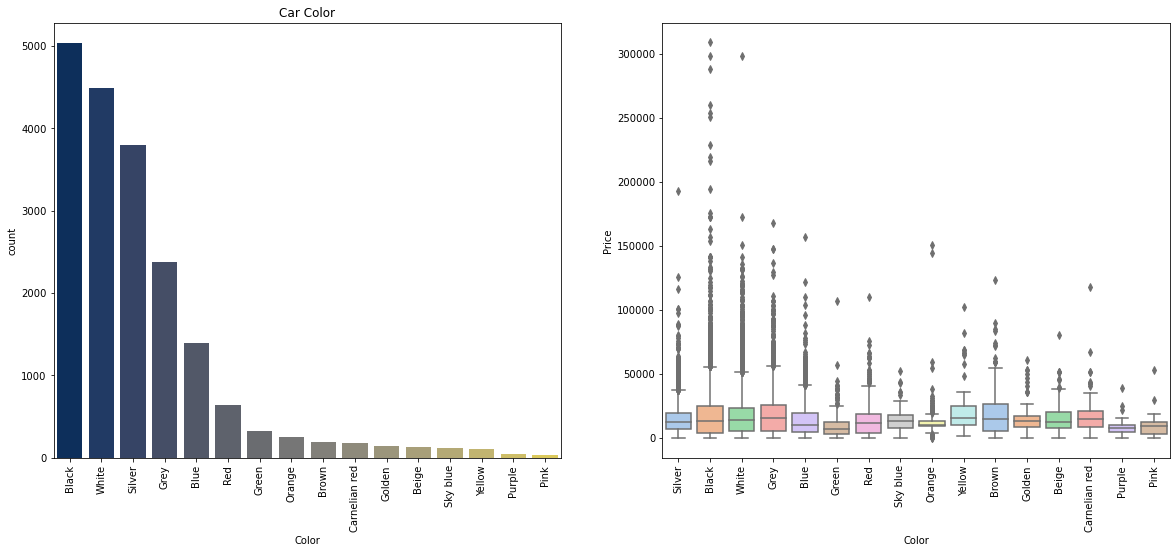

In [130]:
#Color distribution and color against price visualization
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(cars['Color'],palette= ('cividis'),order = cars['Color'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Car Color')


plt.subplot(1,2,2)
sns.boxplot(x=cars['Color'],y = cars.Price,palette=('pastel'))
plt.xticks(rotation = 90)
plt.title
plt.show()

$ Inference $
* In the distribution it is evident that people love black cars the most
* Black cars are also the highest in terms of price


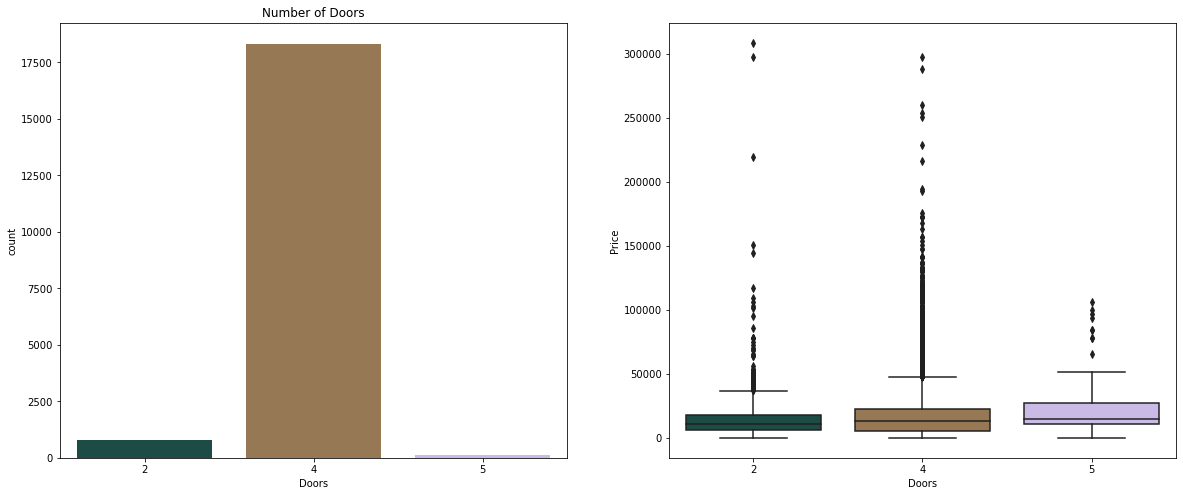

In [131]:
#Visualizing Doors against Price
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(cars['Doors'],palette= ('cubehelix'))
plt.title('Number of Doors')


plt.subplot(1,2,2)
sns.boxplot(x=cars['Doors'],y = cars.Price,palette=('cubehelix'))
plt.title
plt.show()

$ Inference $
* Most cars have four doors
* Prices are varying but the highly priced cars have four doors 

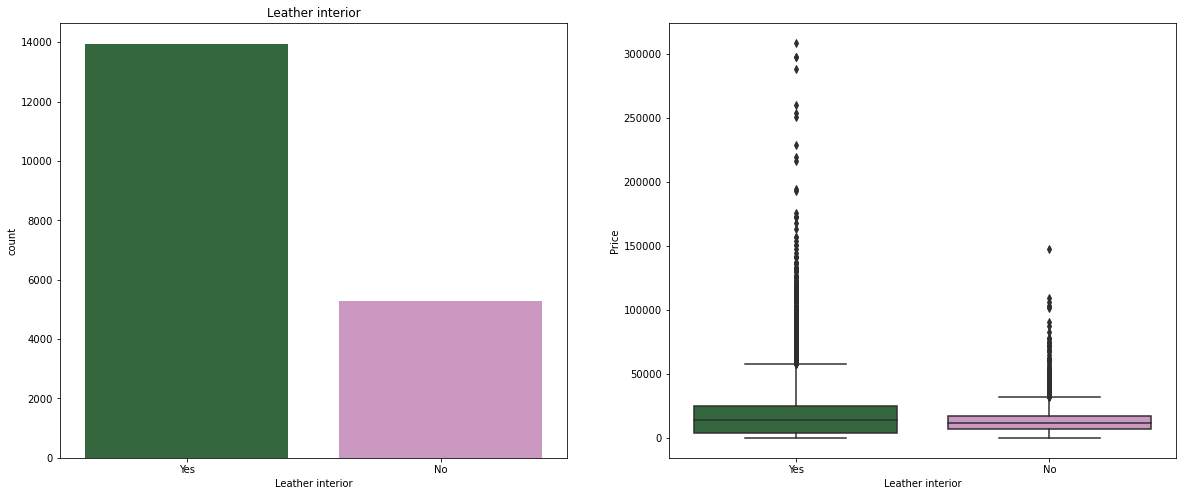

In [132]:
# Visualizing Leather Interior column against Price
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(cars['Leather interior'],palette= ('cubehelix'))
plt.title('Leather interior')


plt.subplot(1,2,2)
sns.boxplot(x=cars['Leather interior'],y = cars.Price,palette=('cubehelix'))
plt.title
plt.show()

$ Inference $
* Leather seats cars are highly prefered  compared to the normal car seats
* Cars with laeather seats are highly priced compared to the normal ones

## Visualizing Numerical Variables Against Price

The duplicates are not removed because they have different column IDs hence useful

In [133]:
# Numeric Variables
Num_variables =cars.select_dtypes(include= ['int64','float64']).columns
Num_variables

Index(['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags'], dtype='object')

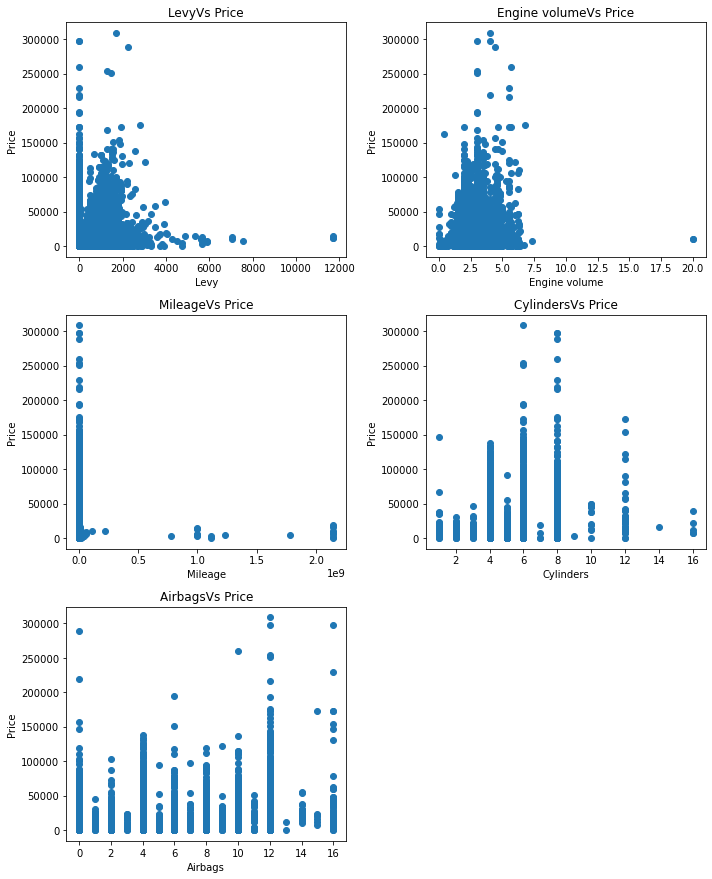

In [134]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['Price'])
    plt.title(x + 'Vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)


plt.figure(figsize=(10,20))
scatter('Levy',1)
scatter('Engine volume',2)
scatter('Mileage',3)
scatter('Cylinders',4)
scatter('Airbags',5)

plt.tight_layout()



$ Inference $
* Airbags,Levy,Cylinders and Engine volume have a significant correlation with Price
* Price and mileage have a little to no significant correlation

## Feature Engineering

* ```Price per engine volume```: The price per engine volume  is calculated by dividing the price by the engine volume. This would allow you to compare the prices of different cars based on their engine size.

* ```Mileage per gallon```: You could calculate the mileage per gallon by dividing the mileage by the engine volume. This would allow you to compare the fuel efficiency of different cars based on their engine size.

* ```Levy adjusted for engine volume```:  This would account for the fact that larger engines typically produce more emissions and therefore may be subject to higher levies.

In [135]:
#Price per engine volume
cars['price_per_engine_volume'] = cars['Price']/cars['Engine volume']

#Mileage per gallon
cars['mileage_per_gallon'] = cars['Mileage']/cars['Engine volume']

# Levy adjusted for engine volume
cars['levy_engine_volume'] = cars['Levy']/cars['Engine volume']

cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,price_per_engine_volume,mileage_per_gallon,levy_engine_volume
ID,,,,,,,,,,,,,,,,,,,,
45654403,13328,1399.0,LEXUS,RX 450,2010-01-01,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,3808.000000,53144.285714,399.714286
44731507,16621,1018.0,CHEVROLET,Equinox,2011-01-01,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,5540.333333,64000.000000,339.333333
45774419,8467,0.0,HONDA,FIT,2006-01-01,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,6513.076923,153846.153846,0.000000
45769185,3607,862.0,FORD,Escape,2011-01-01,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,1442.800000,67586.400000,344.800000
45809263,11726,446.0,HONDA,FIT,2014-01-01,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,9020.000000,70693.076923,343.076923


## Bivariate Analysis

In [136]:
def plot_scatter(df,col):
    plt.figure(figsize = (20,8))
    plt.subplot(1,2,1)
    sns.scatterplot(df[col],df['Price'],color = 'tomato')
    plt.title(col + 'Vs Price')


    plt.subplot(1,2,2)
    sns.boxplot(df[col],color = 'purple')
    plt.title(col + 'Vs Price')
    plt.show()



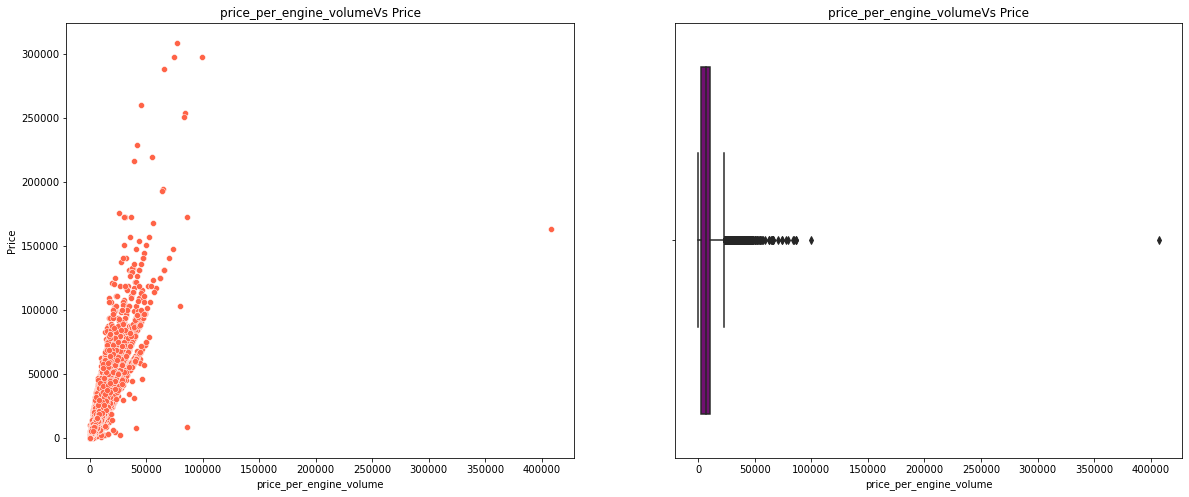

In [137]:
plot_scatter(cars,'price_per_engine_volume')

In [138]:
#Removing outliers in Price_per_engine_volume column
cars = cars.drop(cars[cars['price_per_engine_volume']>100000].index,axis = 0)

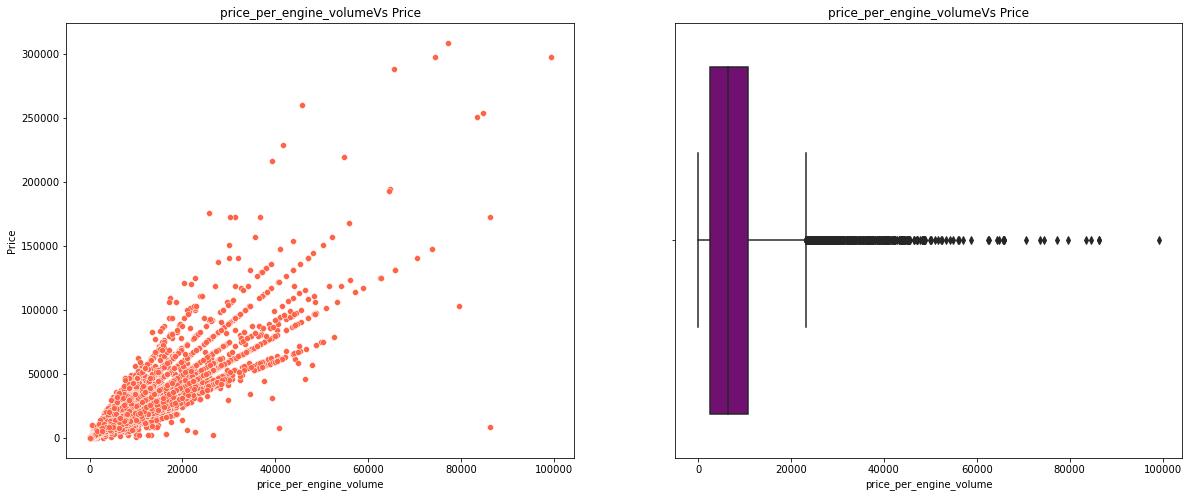

In [139]:
plot_scatter(cars,'price_per_engine_volume')

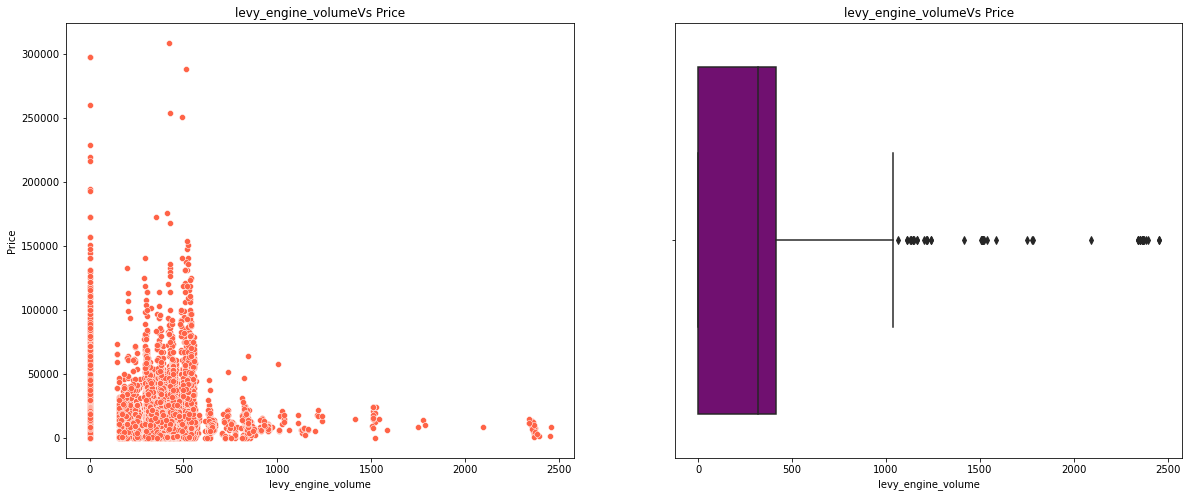

In [140]:
plot_scatter(cars,'levy_engine_volume')

In [141]:
cars = cars.drop(cars[cars['levy_engine_volume']>1000].index,axis = 0)

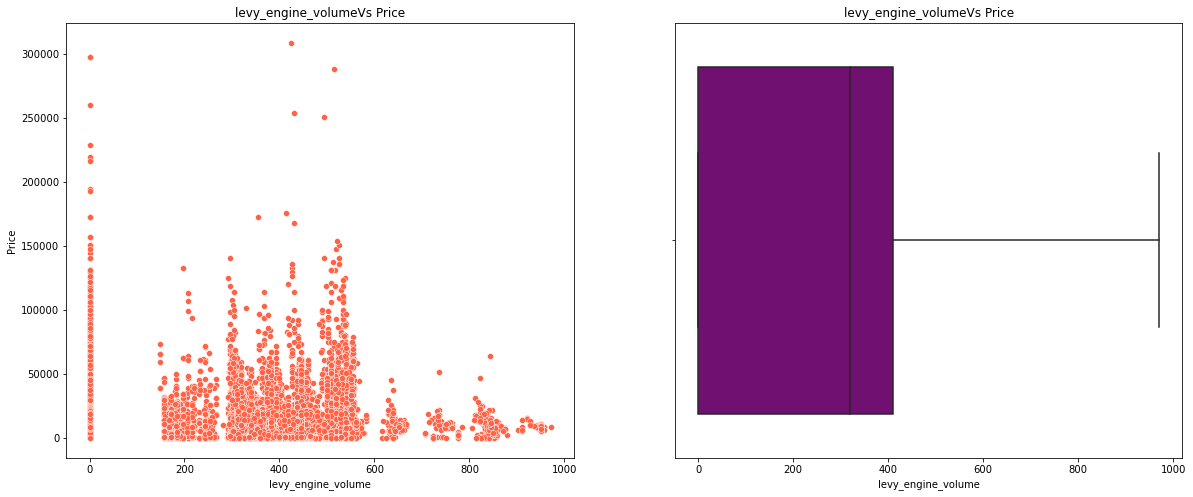

In [142]:
plot_scatter(cars,'levy_engine_volume')

## Correlation between numeric variables

In [143]:
# Numeric Variables
Num_variables =cars.select_dtypes(include= ['int64','float64']).columns
Num_variables

Index(['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
       'price_per_engine_volume', 'mileage_per_gallon', 'levy_engine_volume'],
      dtype='object')

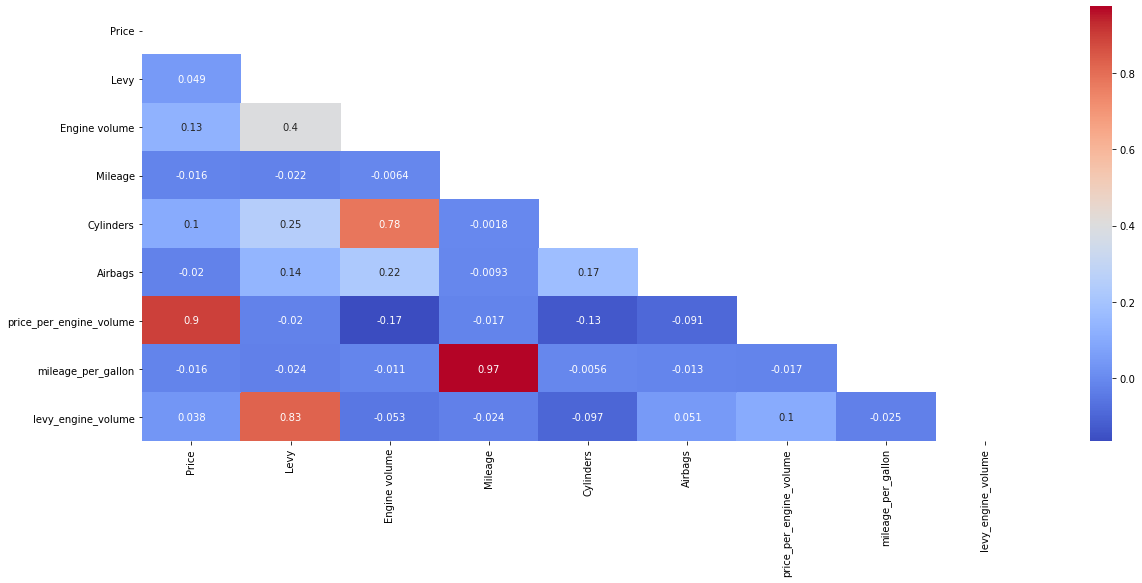

In [144]:
corr = cars[Num_variables].corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=np.triu(corr))
plt.show()

## Modeling

### Significant variables
* Levy
* Airbags
* Engine volume
* mileage_per_gallon


#

In [167]:
cars_base = cars[['Airbags','Mileage','levy_engine_volume','Cylinders']]

## Model 1

In [168]:
X_base = cars_base
Y_base = cars.Price

In [169]:
def ols_regression(X,y):
    X_base = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    print(model.summary())
    return model



In [170]:
ols_regression(X_base,Y_base)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.469
Model:                            OLS   Adj. R-squared (uncentered):              0.468
Method:                 Least Squares   F-statistic:                              4220.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:51:21   Log-Likelihood:                     -2.1512e+05
No. Observations:               19154   AIC:                                  4.303e+05
Df Residuals:                   19150   BIC:                                  4.303e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

## Train Test Split

In [151]:
#Drop the Levy Column
cars_base2 = cars[['Airbags','Engine volume','mileage_per_gallon']]

In [153]:

X = cars_base2
y = cars.Price

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
model = sm.OLS(y_train,X_train).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.456
Model:                            OLS   Adj. R-squared (uncentered):              0.455
Method:                 Least Squares   F-statistic:                              4273.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:38:35   Log-Likelihood:                     -1.7229e+05
No. Observations:               15323   AIC:                                  3.446e+05
Df Residuals:                   15320   BIC:                                  3.446e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------